In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
import sklearn
import impyute

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


from numpy.random import seed


In [2]:
#INPUT DATA

data = pd.read_csv('data.csv') 
data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,u,g,0.00,w,0,True,v,1.25,True,1,False,202,g,Success
1,a,58.67,u,g,4.46,q,560,True,h,3.04,True,6,False,43,g,Success
2,a,24.50,u,g,0.50,q,824,False,h,1.50,True,0,False,280,g,Success
3,b,27.83,u,g,1.54,w,3,True,v,3.75,True,5,True,100,g,Success
4,b,25.00,u,g,11.25,c,1208,True,v,2.50,True,17,False,200,g,Success


In [3]:
Tdata = pd.read_csv('testdata_10.csv') 
Tdata.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,32.67,y,p,9.000,w,0,False,h,5.250,True,0,True,154,g,NaN
1,?,20.08,u,g,0.125,q,768,True,v,1.000,False,1,False,240,g,NaN
2,b,20.08,u,g,0.250,q,0,False,v,0.125,False,0,False,200,g,NaN
3,b,22.17,u,g,2.250,i,10,False,v,0.125,False,0,False,160,g,NaN
4,a,27.25,u,g,0.290,m,108,True,h,0.125,False,1,True,272,g,NaN


In [4]:
data.describe()

,A5,A7,A10,A12
count,552.000000,552.000000,552.000000,552.000000
mean,4.885743,1100.827899,2.400091,2.614130
std,5.086520,5628.306468,3.550918,5.161073
min,0.000000,0.000000,0.000000,0.000000
25%,1.087500,0.000000,0.170000,0.000000
50%,2.750000,5.000000,1.000000,0.000000
75%,7.552500,456.500000,3.000000,3.000000
max,28.000000,100000.000000,28.500000,67.000000


In [5]:
data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [6]:
#Find unique values in each artibute
for i in data:
    print(i,data[i].unique(),"\n=============================================================================\n")

A1 ['b' 'a' '?'] 

A2 ['30.83' '58.67' '24.50' '27.83' '25.00' '23.25' '47.75' '27.42' '41.17'
 '15.83' '47.00' '56.58' '57.42' '42.08' '29.25' '42.00' '49.50' '36.75'
 '22.58' '27.25' '23.00' '27.75' '54.58' '34.17' '28.92' '29.67' '39.58'
 '56.42' '54.33' '41.00' '31.92' '41.50' '23.92' '25.75' '26.00' '37.42'
 '34.92' '34.25' '23.33' '23.17' '44.33' '35.17' '43.25' '56.75' '31.67'
 '23.42' '20.42' '26.67' '36.00' '25.50' '19.42' '32.33' '34.83' '38.58'
 '44.25' '44.83' '20.67' '34.08' '19.17' '21.67' '21.50' '49.58' '27.67'
 '39.83' '?' '37.17' '25.67' '34.00' '49.00' '62.50' '31.42' '52.33'
 '28.75' '28.58' '22.50' '28.50' '37.50' '35.25' '18.67' '54.83' '40.92'
 '19.75' '29.17' '24.58' '33.75' '25.42' '37.75' '52.50' '57.83' '20.75'
 '39.92' '24.75' '44.17' '23.50' '47.67' '22.75' '34.42' '28.42' '67.75'
 '47.42' '36.25' '32.67' '48.58' '33.58' '18.83' '26.92' '31.25' '56.50'
 '43.00' '22.33' '32.83' '40.33' '30.50' '52.83' '46.67' '58.33' '37.33'
 '23.08' '32.75' '68.67' '28.00' 

In [7]:
data=data.replace('?',np.NaN) #remove \t from data
Tdata=Tdata.replace('?',np.NaN)

In [8]:
data.isna().sum()

A1      8
A2     10
A3      4
A4      4
A5      0
A6      6
A7      0
A8      0
A9      6
A10     0
A11     0
A12     0
A13     0
A14    10
A15     0
A16     0
dtype: int64

In [9]:
Data=data

Data["A1"]=Data["A1"].replace('a',1,regex=True) #at A1 a=1
Data["A1"]=Data["A1"].replace('b',2,regex=True) #at A1 b=2


Data["A3"]=Data["A3"].replace('l',1,regex=True) #at A1 l=1
Data["A3"]=Data["A3"].replace('u',2,regex=True) #at A1 u=2
Data["A3"]=Data["A3"].replace('y',3,regex=True) #at A1 y=3


Data["A4"]=Data["A4"].replace('gg',1,regex=True) #at A1 gg=1
Data["A4"]=Data["A4"].replace('g',2,regex=True) #at A1 g=2
Data["A4"]=Data["A4"].replace('p',3,regex=True) #at A1 p=3


Data["A6"]=Data["A6"].replace('aa',1,regex=True) #at A6 gg=1
Data["A6"]=Data["A6"].replace('cc',2,regex=True) #at A6 g=2
Data["A6"]=Data["A6"].replace('ff',3,regex=True) #at A6 p=3
Data["A6"]=Data["A6"].replace('m',4,regex=True) #at A6 g=4
Data["A6"]=Data["A6"].replace('k',5,regex=True) #at A6 p=5
Data["A6"]=Data["A6"].replace('j',6,regex=True) #at A6 gg=6
Data["A6"]=Data["A6"].replace('r',7,regex=True) #at A6 g=7
Data["A6"]=Data["A6"].replace('w',8,regex=True) #at A6 p=8
Data["A6"]=Data["A6"].replace('q',9,regex=True) #at A6 gg=9
Data["A6"]=Data["A6"].replace('c',10,regex=True) #at A6 g=10
Data["A6"]=Data["A6"].replace('x',11,regex=True) #at A6 p=11
Data["A6"]=Data["A6"].replace('i',12,regex=True) #at A6 gg=12
Data["A6"]=Data["A6"].replace('d',13,regex=True) #at A6 g=13
Data["A6"]=Data["A6"].replace('e',14,regex=True) #at A6 p=14


Data["A8"]=Data["A8"].replace(True,1,regex=True) #at A8 g=2
Data["A8"]=Data["A8"].replace(False,0,regex=True) #at A8 p=3

Data["A11"]=Data["A11"].replace(True,1,regex=True) #at A13 g=2
Data["A11"]=Data["A11"].replace(False,0,regex=True) #at A13 p=3

Data["A13"]=Data["A13"].replace(True,1,regex=True) #at A13 g=2
Data["A13"]=Data["A13"].replace(False,0,regex=True) #at A13 p=3


Data["A15"]=Data["A15"].replace('g',1,regex=True) #at A15 g=1
Data["A15"]=Data["A15"].replace('s',2,regex=True) #at A15 s=2
Data["A15"]=Data["A15"].replace('p',3,regex=True) #at A15 p=3


Data["A16"]=Data["A16"].replace('Success',1,regex=True) #at A16 True=1
Data["A16"]=Data["A16"].replace('Failure',0,regex=True) #at A16 Flase=0


Data["A9"]=Data["A9"].replace('v',1,regex=True) #at A6 gg=1
Data["A9"]=Data["A9"].replace('h',2,regex=True) #at A6 g=2
Data["A9"]=Data["A9"].replace('bb',3,regex=True) #at A6 p=3
Data["A9"]=Data["A9"].replace('ff',4,regex=True) #at A6 g=4
Data["A9"]=Data["A9"].replace('j',5,regex=True) #at A6 p=5
Data["A9"]=Data["A9"].replace('z',6,regex=True) #at A6 gg=6
Data["A9"]=Data["A9"].replace('o',7,regex=True) #at A6 g=7
Data["A9"]=Data["A9"].replace('dd',8,regex=True) #at A6 p=8
Data["A9"]=Data["A9"].replace('n',9,regex=True) #at A6 gg=9


In [10]:
TData=Tdata

TData["A1"]=TData["A1"].replace('a',1,regex=True) #at A1 a=1
TData["A1"]=TData["A1"].replace('b',2,regex=True) #at A1 b=2


TData["A3"]=TData["A3"].replace('l',1,regex=True) #at A1 l=1
TData["A3"]=TData["A3"].replace('u',2,regex=True) #at A1 u=2
TData["A3"]=TData["A3"].replace('y',3,regex=True) #at A1 y=3


TData["A4"]=TData["A4"].replace('gg',1,regex=True) #at A1 gg=1
TData["A4"]=TData["A4"].replace('g',2,regex=True) #at A1 g=2
TData["A4"]=TData["A4"].replace('p',3,regex=True) #at A1 p=3


TData["A6"]=TData["A6"].replace('aa',1,regex=True) #at A6 gg=1
TData["A6"]=TData["A6"].replace('cc',2,regex=True) #at A6 g=2
TData["A6"]=TData["A6"].replace('ff',3,regex=True) #at A6 p=3
TData["A6"]=TData["A6"].replace('m',4,regex=True) #at A6 g=4
TData["A6"]=TData["A6"].replace('k',5,regex=True) #at A6 p=5
TData["A6"]=TData["A6"].replace('j',6,regex=True) #at A6 gg=6
TData["A6"]=TData["A6"].replace('r',7,regex=True) #at A6 g=7
TData["A6"]=TData["A6"].replace('w',8,regex=True) #at A6 p=8
TData["A6"]=TData["A6"].replace('q',9,regex=True) #at A6 gg=9
TData["A6"]=TData["A6"].replace('c',10,regex=True) #at A6 g=10
TData["A6"]=TData["A6"].replace('x',11,regex=True) #at A6 p=11
TData["A6"]=TData["A6"].replace('i',12,regex=True) #at A6 gg=12
TData["A6"]=TData["A6"].replace('d',13,regex=True) #at A6 g=13
TData["A6"]=TData["A6"].replace('e',14,regex=True) #at A6 p=14


TData["A8"]=TData["A8"].replace(True,1,regex=True) #at A8 g=2
TData["A8"]=TData["A8"].replace(False,0,regex=True) #at A8 p=3

TData["A11"]=TData["A11"].replace(True,1,regex=True) #at A13 g=2
TData["A11"]=TData["A11"].replace(False,0,regex=True) #at A13 p=3

TData["A13"]=TData["A13"].replace(True,1,regex=True) #at A13 g=2
TData["A13"]=TData["A13"].replace(False,0,regex=True) #at A13 p=3


TData["A15"]=TData["A15"].replace('g',1,regex=True) #at A15 g=1
TData["A15"]=TData["A15"].replace('s',2,regex=True) #at A15 s=2
TData["A15"]=TData["A15"].replace('p',3,regex=True) #at A15 p=3


TData["A16"]=TData["A16"].replace('Success',1,regex=True) #at A16 True=1
TData["A16"]=TData["A16"].replace('Failure',0,regex=True) #at A16 Flase=0


TData["A9"]=TData["A9"].replace('v',1,regex=True) #at A6 gg=1
TData["A9"]=TData["A9"].replace('h',2,regex=True) #at A6 g=2
TData["A9"]=TData["A9"].replace('bb',3,regex=True) #at A6 p=3
TData["A9"]=TData["A9"].replace('ff',4,regex=True) #at A6 g=4
TData["A9"]=TData["A9"].replace('j',5,regex=True) #at A6 p=5
TData["A9"]=TData["A9"].replace('z',6,regex=True) #at A6 gg=6
TData["A9"]=TData["A9"].replace('o',7,regex=True) #at A6 g=7
TData["A9"]=TData["A9"].replace('dd',8,regex=True) #at A6 p=8
TData["A9"]=TData["A9"].replace('n',9,regex=True) #at A6 gg=9


In [11]:
Data.dtypes

A1     float64
A2      object
A3     float64
A4     float64
A5     float64
A6     float64
A7       int64
A8     float64
A9     float64
A10    float64
A11    float64
A12      int64
A13    float64
A14     object
A15      int64
A16      int64
dtype: object

In [12]:
Data['A2'] = Data['A2'].astype(float)
Data['A14'] = Data['A14'].astype(float)
Data['A9'] = Data['A9'].astype(float)

In [13]:
#Find unique values in each artibute
for i in data:
    print(i,Data[i].unique(),"\n=============================================================================\n")

A1 [ 2.  1. nan] 

A2 [30.83 58.67 24.5  27.83 25.   23.25 47.75 27.42 41.17 15.83 47.   56.58
 57.42 42.08 29.25 42.   49.5  36.75 22.58 27.25 23.   27.75 54.58 34.17
 28.92 29.67 39.58 56.42 54.33 41.   31.92 41.5  23.92 25.75 26.   37.42
 34.92 34.25 23.33 23.17 44.33 35.17 43.25 56.75 31.67 23.42 20.42 26.67
 36.   25.5  19.42 32.33 34.83 38.58 44.25 44.83 20.67 34.08 19.17 21.67
 21.5  49.58 27.67 39.83   nan 37.17 25.67 34.   49.   62.5  31.42 52.33
 28.75 28.58 22.5  28.5  37.5  35.25 18.67 54.83 40.92 19.75 29.17 24.58
 33.75 25.42 37.75 52.5  57.83 20.75 39.92 24.75 44.17 23.5  47.67 22.75
 34.42 28.42 67.75 47.42 36.25 32.67 48.58 33.58 18.83 26.92 31.25 56.5
 43.   22.33 32.83 40.33 30.5  52.83 46.67 58.33 37.33 23.08 32.75 68.67
 28.   44.   25.08 32.   60.58 40.83 19.33 36.67 41.33 56.   49.83 22.67
 27.   26.08 18.42 20.17 21.25 57.08 22.42 48.75 40.   40.58 28.67 33.08
 21.33 41.75 34.5  28.25 33.17 48.17 27.58 24.08 24.83 36.33 35.42 71.58
 39.5  39.33 24.33 60.08 55.92

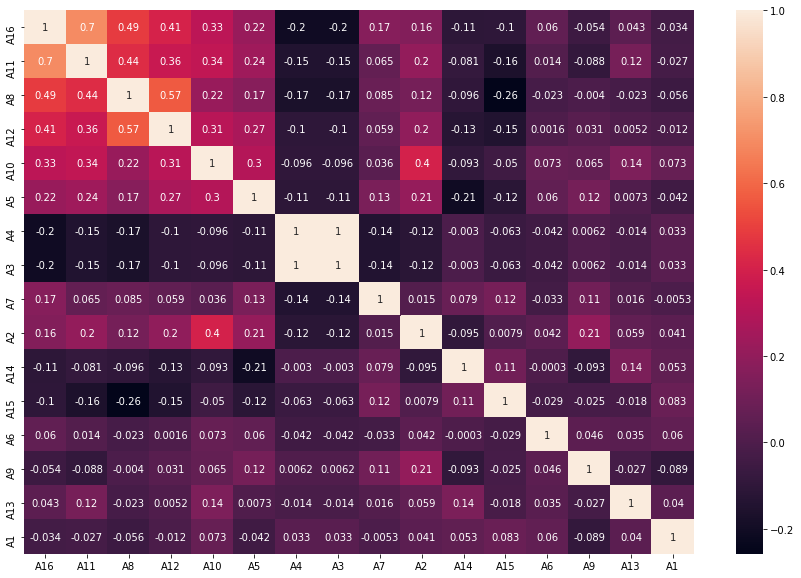

In [14]:
from pandas import DataFrame
import seaborn as sn
p=abs(Data.corr()).sort_values(by=['A16']).transpose()
t_cor=p.columns

t=t_cor[::-1]
df = DataFrame(Data[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 10},ax=ax)

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


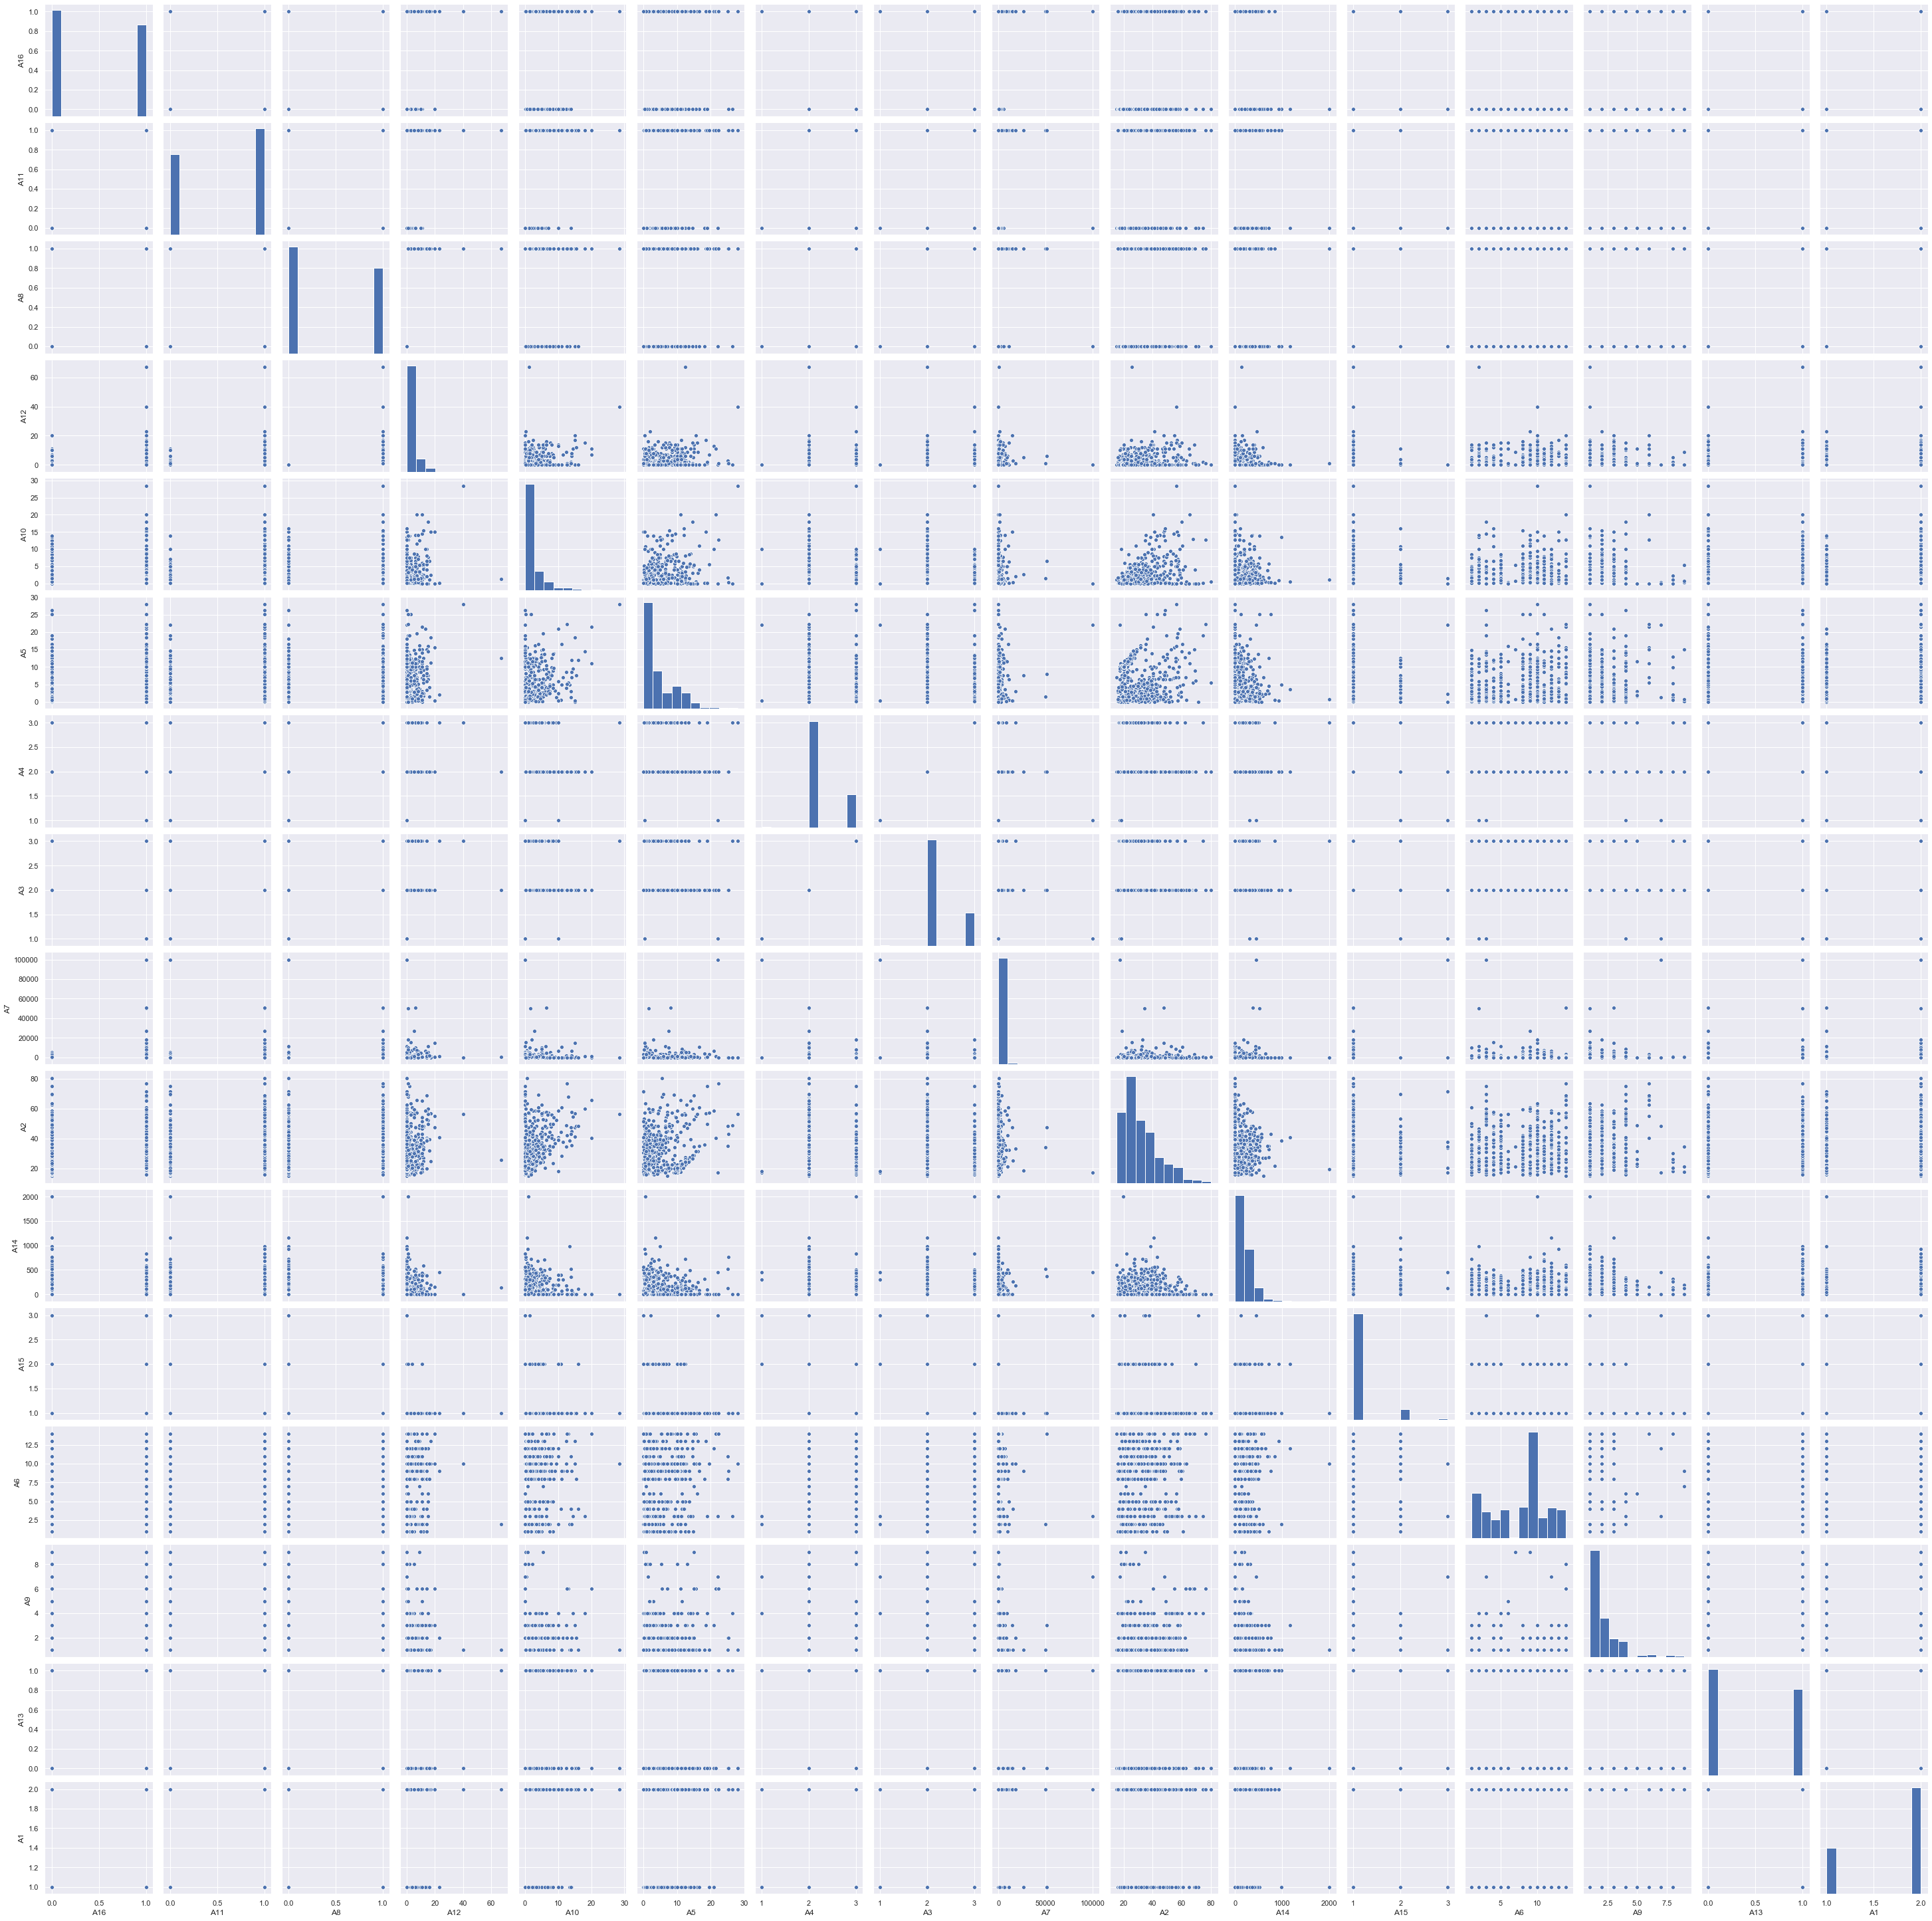

In [15]:
sns.set()
sns.pairplot(Data[t], size = 2.5)
plt.show();

In [16]:
import numpy as np
from sklearn.impute import KNNImputer

P=t_cor

subdata_in = Data.loc[:,P]

imputer = KNNImputer(n_neighbors=400)
subData=imputer.fit_transform(subdata_in)

D=dict()
for i in range (len(P)):
    D[P[i]]=subData[:, i]

filledData = pd.DataFrame(D)

filledData.describe()

,A1,A13,A9,A6,A15,A14,A2,A7,A3,A4,A5,A10,A12,A8,A11,A16
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,1.696821,0.447464,1.904851,7.786173,1.112319,186.908451,31.963844,1100.827899,2.233804,2.233804,4.885743,2.400091,2.614130,0.445652,0.568841,0.461957
std,0.456761,0.497683,1.426384,3.820722,0.348802,180.927587,12.100875,5628.306468,0.430477,0.430477,5.086520,3.550918,5.161073,0.497488,0.495687,0.499003
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,15.170000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,4.000000,1.000000,74.500000,22.750000,0.000000,2.000000,2.000000,1.087500,0.170000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,9.000000,1.000000,160.000000,28.710000,5.000000,2.000000,2.000000,2.750000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,2.000000,10.000000,1.000000,280.000000,38.960000,456.500000,2.000000,2.000000,7.552500,3.000000,3.000000,1.000000,1.000000,1.000000
max,2.000000,1.000000,9.000000,14.000000,3.000000,2000.000000,80.250000,100000.000000,3.000000,3.000000,28.000000,28.500000,67.000000,1.000000,1.000000,1.000000


In [17]:
filledData.isna().sum()

A1     0
A13    0
A9     0
A6     0
A15    0
A14    0
A2     0
A7     0
A3     0
A4     0
A5     0
A10    0
A12    0
A8     0
A11    0
A16    0
dtype: int64

In [18]:
# Training model

def models(X_train,Y_train):
    
    #Use Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0,solver='lbfgs')
    log.fit(X_train,Y_train)
    print("LR Done")
    
    #Use Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5,metric="minkowski",p=2)
    knn.fit(X_train,Y_train)
    print("KNN Done")
    
    #Use SVC (linear kernel)
    from sklearn.svm import SVC
    svc_lin=SVC(kernel="linear",random_state=0)
    svc_lin.fit(X_train,Y_train)
    print("SVC L Done")
    
    #Use SVC (RBF kernel)
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel="rbf",gamma='auto',random_state=0)
    svc_rbf.fit(X_train,Y_train)
    print("SVC RBF Done")
    
    #Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    print("GNB Done")
    
    #Use Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier( criterion="entropy" ,random_state=0,max_depth=6)
    tree.fit(X_train,Y_train)
    print("DT Done")
    
    #Use Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state=0)
    forest.fit(X_train,Y_train)
    print("RFC Done")
    
    #Use XGBClassifier
    import xgboost as xgb
    modelx=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
    modelx.fit(X_train,Y_train)
    print("XGB Done")
    
    #Use ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ExtraTree=ExtraTreesClassifier(n_estimators=100, max_depth=None,min_samples_split=2, random_state=8)
    ExtraTree.fit(X_train,Y_train)
    print("ETC Done")
    
    #use AdaBoostClassifier
    from sklearn.ensemble import AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100)
    AdaBoost.fit(X_train,Y_train)
    print("ABC Done")
    
    #print the accuracy of each model
    print("[0] Logistic Regression Training Accuracy: ",log.score(X_train,Y_train))
    print("[1] K Neighbors Regression Training Accuracy: ",knn.score(X_train,Y_train))
    print("[2] SVC Linear Training Accuracy: ",svc_lin.score(X_train,Y_train))
    print("[3] SVC RBF Training Accuracy: ",svc_rbf.score(X_train,Y_train))
    print("[4] Gaussian NB Training Accuracy: ",gauss.score(X_train,Y_train))
    print("[5] Decision Tree Training Accuracy: ",tree.score(X_train,Y_train))
    print("[6] Random Forest Training Accuracy: ",forest.score(X_train,Y_train))
    print("[7] XGBClassifier Training Accuracy: ",modelx.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy: ",ExtraTree.score(X_train,Y_train))
    print("[9] AdaBoostClassifierr Training Accuracy: ",AdaBoost.score(X_train,Y_train))
    
    
    return  log,knn, svc_lin, svc_rbf, gauss, tree, forest,modelx,ExtraTree,AdaBoost

In [19]:
filledData.describe()

,A1,A13,A9,A6,A15,A14,A2,A7,A3,A4,A5,A10,A12,A8,A11,A16
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,1.696821,0.447464,1.904851,7.786173,1.112319,186.908451,31.963844,1100.827899,2.233804,2.233804,4.885743,2.400091,2.614130,0.445652,0.568841,0.461957
std,0.456761,0.497683,1.426384,3.820722,0.348802,180.927587,12.100875,5628.306468,0.430477,0.430477,5.086520,3.550918,5.161073,0.497488,0.495687,0.499003
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,15.170000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,4.000000,1.000000,74.500000,22.750000,0.000000,2.000000,2.000000,1.087500,0.170000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,9.000000,1.000000,160.000000,28.710000,5.000000,2.000000,2.000000,2.750000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,2.000000,10.000000,1.000000,280.000000,38.960000,456.500000,2.000000,2.000000,7.552500,3.000000,3.000000,1.000000,1.000000,1.000000
max,2.000000,1.000000,9.000000,14.000000,3.000000,2000.000000,80.250000,100000.000000,3.000000,3.000000,28.000000,28.500000,67.000000,1.000000,1.000000,1.000000


In [20]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    if iqr==0:iqr=q1
    fence_low  = q1-3*iqr
    fence_high = q3+3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [21]:
p=['A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1'] 
filled_filters_data=filledData.loc[:,p+['A16']]
p=[  'A12', 'A10', 'A5',   'A7', 'A2', 'A14']
for i in p:
    filled_filters_data[i]=remove_outlier(filled_filters_data, i)
filled_filters_data.describe()

,A11,A8,A12,A10,A5,A4,A3,A7,A2,A14,A15,A6,A9,A13,A1,A16
count,552.000000,552.000000,523.000000,530.000000,551.000000,552.000000,552.000000,489.000000,552.000000,548.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.568841,0.445652,0.544933,0.552830,0.568058,2.233804,2.233804,0.537832,0.568841,0.569343,1.112319,7.786173,1.904851,0.447464,1.696821,0.461957
std,0.495687,0.497488,0.498454,0.497671,0.495797,0.430477,0.430477,0.499077,0.495687,0.495621,0.348802,3.820722,1.426384,0.497683,0.456761,0.499003
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,0.000000,2.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,3.000000,14.000000,9.000000,1.000000,2.000000,1.000000


In [22]:
p=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1']

#p=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14']

subdata = filled_filters_data.loc[:,p+['A16']]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,['A16']]




# Train and test set 70% : 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
                                              
#X_CV,X_test,Y_CV,Y_test=train_test_split(X_T,Y_T,test_size=0.5,random_state=4)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData),len(subdata),"        Train and test set 70% : 30%")
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifier"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    

    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1'] 
size = 452 552         Train and test set 70% : 30%


LR Done
KNN Done
SVC L Done
SVC RBF Done
GNB Done
DT Done
RFC Done
XGB Done
ETC Done
ABC Done
[0] Logistic Regression Training Accuracy:  0.8322784810126582
[1] K Neighbors Regression Training Accuracy:  0.8449367088607594
[2] SVC Linear Training Accuracy:  0.810126582278481
[3] SVC RBF Training Accuracy:  0.8481012658227848
[4] Gaussian NB Training Accuracy:  0.810126582278481
[5] Decision Tree Training Accuracy:  0.8765822784810127
[6] Random Forest Training Accuracy:  0.9588607594936709
[7] XGBClassifier Training Accuracy:  0.8512658227848101
[8] ExtraTreesClassifier Training Accuracy:  0.9683544303797469
[9] AdaBoostClassifierr Training Accuracy:  0.8417721518987342


Logistic Regression Testing Accuracy =  0.8602941176470589 

	TP: 49 	FP: 11 
	TN: 68 	FN: 8



K Neighbors Testing Accuracy =  0.8602941176470589 



In [23]:
filledData.describe()

,A1,A13,A9,A6,A15,A14,A2,A7,A3,A4,A5,A10,A12,A8,A11,A16
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,1.696821,0.447464,1.904851,7.786173,1.112319,186.908451,31.963844,1100.827899,2.233804,2.233804,4.885743,2.400091,2.614130,0.445652,0.568841,0.461957
std,0.456761,0.497683,1.426384,3.820722,0.348802,180.927587,12.100875,5628.306468,0.430477,0.430477,5.086520,3.550918,5.161073,0.497488,0.495687,0.499003
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,15.170000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,4.000000,1.000000,74.500000,22.750000,0.000000,2.000000,2.000000,1.087500,0.170000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,9.000000,1.000000,160.000000,28.710000,5.000000,2.000000,2.000000,2.750000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,2.000000,10.000000,1.000000,280.000000,38.960000,456.500000,2.000000,2.000000,7.552500,3.000000,3.000000,1.000000,1.000000,1.000000
max,2.000000,1.000000,9.000000,14.000000,3.000000,2000.000000,80.250000,100000.000000,3.000000,3.000000,28.000000,28.500000,67.000000,1.000000,1.000000,1.000000


In [24]:
filledData.isna().sum()

A1     0
A13    0
A9     0
A6     0
A15    0
A14    0
A2     0
A7     0
A3     0
A4     0
A5     0
A10    0
A12    0
A8     0
A11    0
A16    0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

p=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1']
df_mix = filledData.loc[:,p+['A16']]



highCo=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1']
len(highCo)

subData = df_mix.loc[:,highCo]


from sklearn.decomposition import PCA
pca=PCA(n_components=8, copy=True, whiten=False, svd_solver='auto', tol=0.1, 
                          iterated_power='auto')

principalComponents = pca.fit_transform(subData)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])



Std_data_Train=principalDf.head(24000)
Std_Data_Train = Std_data_Train.join(Data["A16"])

Std_Data_Test=principalDf.tail(6000)

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['A16']))
print(sum(cls))


2.26417698890324


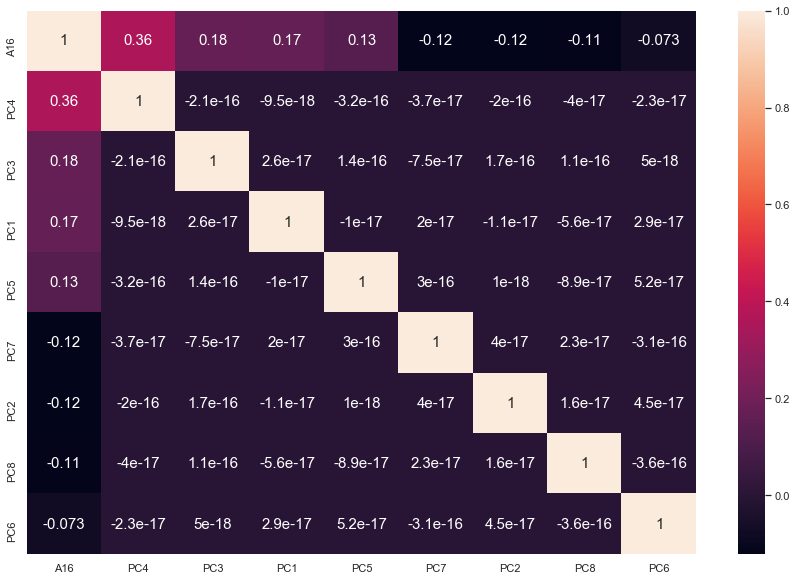

In [26]:
from pandas import DataFrame
import seaborn as sn

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['A16']))
p=cls.sort_values(ascending=False)

t=p.index

df = DataFrame(Std_Data_Train[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 15},ax=ax)

C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


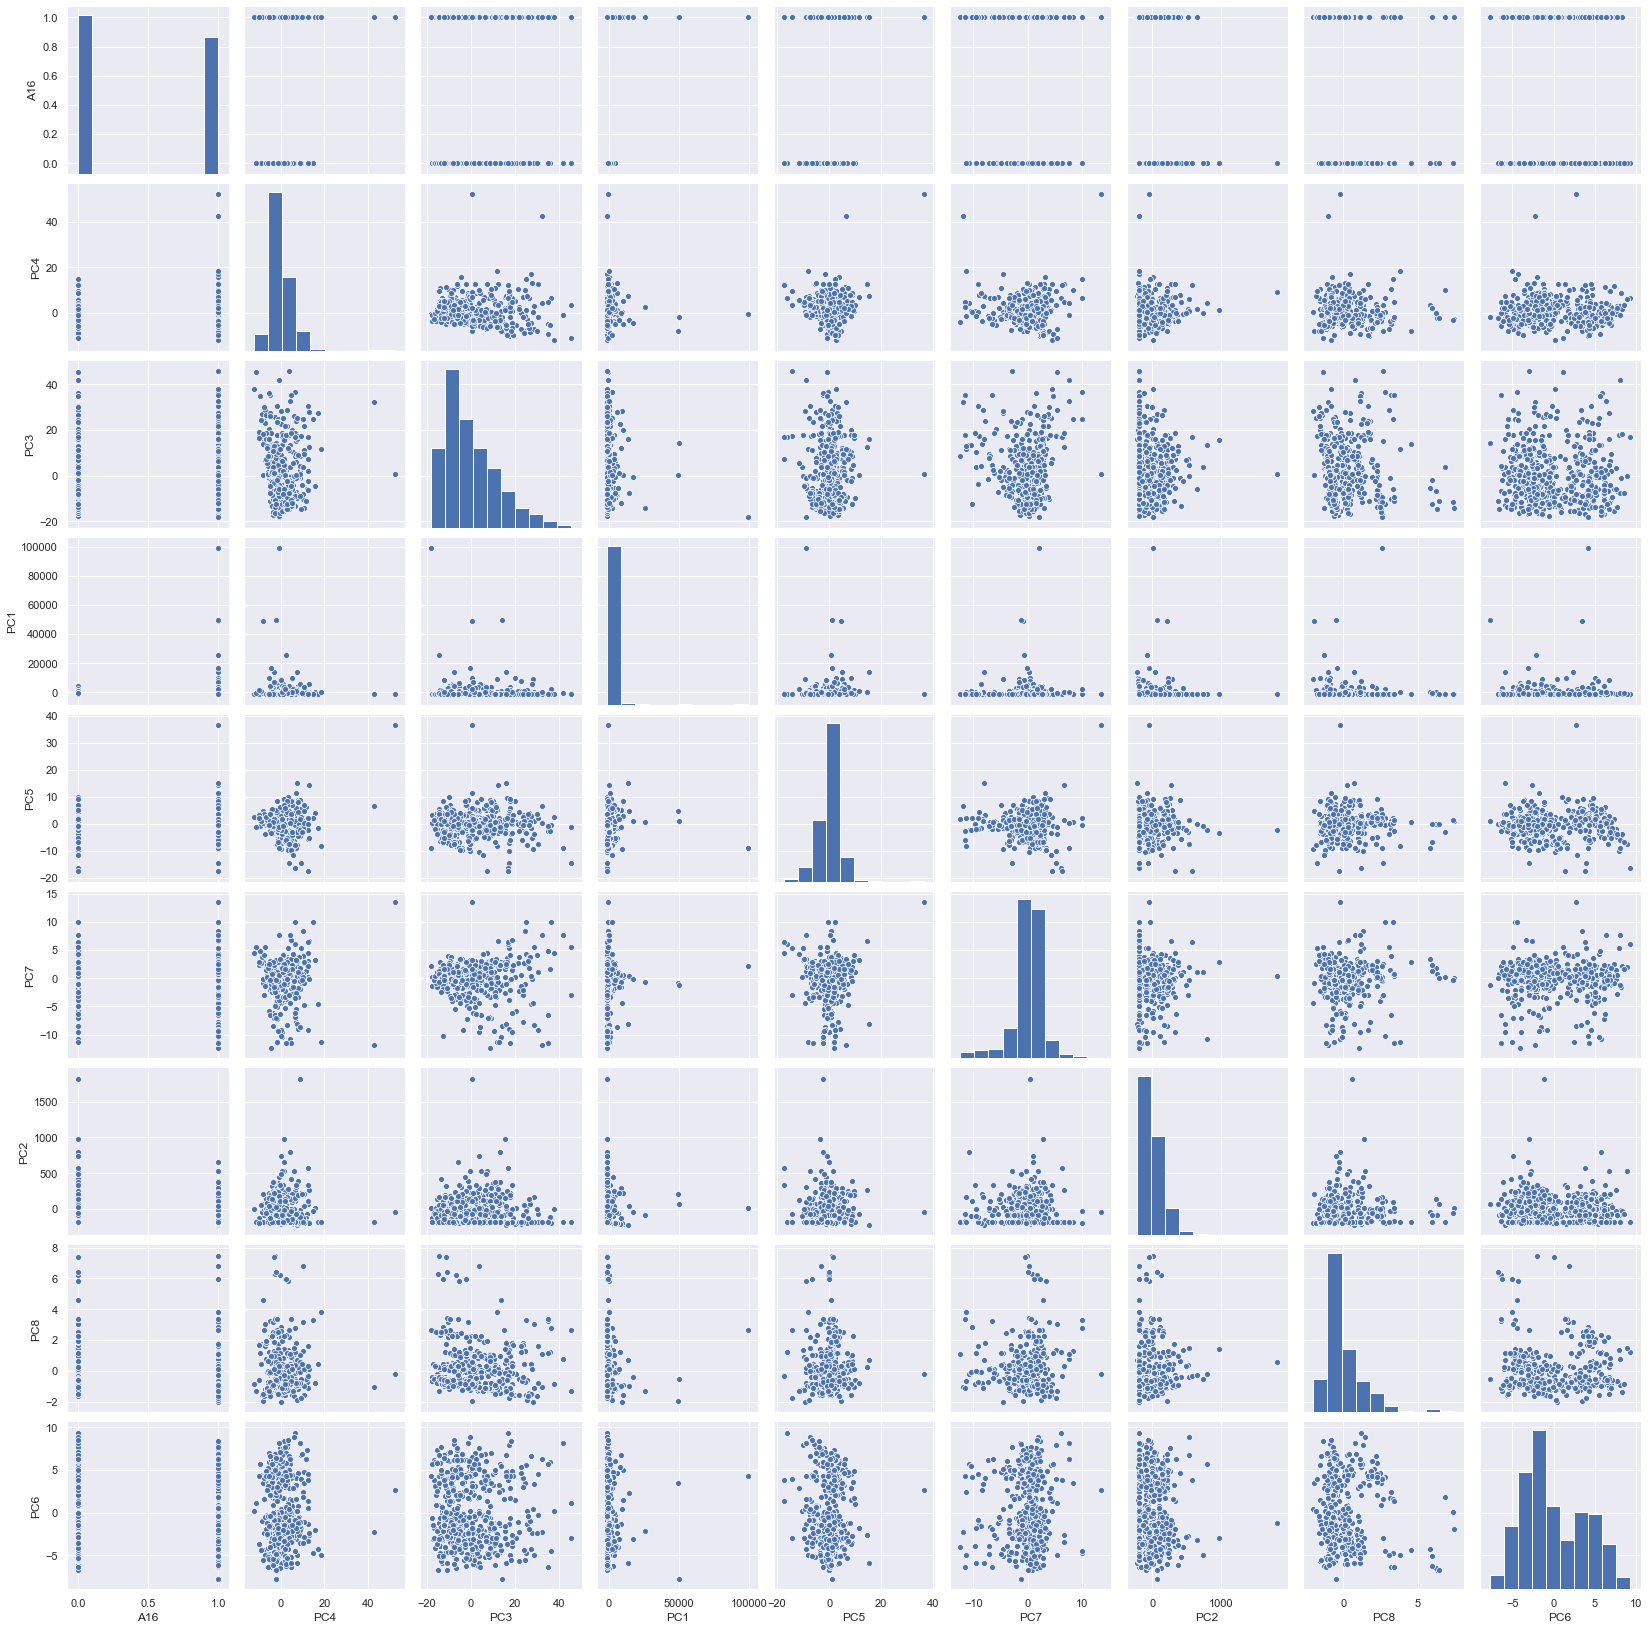

In [27]:
sns.set()
sns.pairplot(Std_Data_Train[t], size = 2.5)
plt.show();

In [28]:
#['PC4', 'PC3','PC1','PC5', 'PC7','PC2','PC8','PC6']

p=['PC4', 'PC3','PC1','PC5', 'PC7','PC2','PC8','PC6']

a
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["A16"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
Y_train = np.array(np.ravel(Y_train)).astype(int)


print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


model = models(X_train,Y_train)
ms=["Logistic Regression","K Neighbors","SVC Linear","SVC RBF","Gaussian NB","Decision Tree","Random Forest",
    "XGBClassifier","ExtraTreesClassifier","AdaBoostClassifierr"]

print("\n============================================================================================\n")
from sklearn.metrics import confusion_matrix
for i in range (len(model)):
    cm= confusion_matrix(Y_test,model[i].predict(X_test))
    
    #Extract  TN, FP ,FN, TP
    TN, FP ,FN, TP =  cm.ravel()
    
    test_score=(TP+TN)/(TN+ FP +FN+ TP)
    #print(cm)
    print(ms[i],'Testing Accuracy = ',test_score,"\n")
    print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
    print("\n"*2)
    


Only considering ['PC4', 'PC3', 'PC1', 'PC5', 'PC7', 'PC2', 'PC8', 'PC6'] 
size = 552


LR Done
KNN Done


C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


SVC L Done
SVC RBF Done
GNB Done
DT Done
RFC Done
XGB Done
ETC Done
ABC Done
[0] Logistic Regression Training Accuracy:  0.7777777777777778
[1] K Neighbors Regression Training Accuracy:  0.7755102040816326
[2] SVC Linear Training Accuracy:  0.7573696145124716
[3] SVC RBF Training Accuracy:  1.0
[4] Gaussian NB Training Accuracy:  0.6802721088435374
[5] Decision Tree Training Accuracy:  0.8662131519274376
[6] Random Forest Training Accuracy:  0.9795918367346939
[7] XGBClassifier Training Accuracy:  0.8299319727891157
[8] ExtraTreesClassifier Training Accuracy:  1.0
[9] AdaBoostClassifierr Training Accuracy:  0.9251700680272109


Logistic Regression Testing Accuracy =  0.7567567567567568 

	TP: 38 	FP: 5 
	TN: 46 	FN: 22



K Neighbors Testing Accuracy =  0.6576576576576577 

	TP: 34 	FP: 12 
	TN: 39 	FN: 26



SVC Linear Testing Accuracy =  0.7567567567567568 

	TP: 42 	FP: 9 
	TN: 42 	FN: 18



SVC RBF Testing Accuracy =  0.44144144144144143 

	TP: 0 	FP: 2 
	TN: 49 	FN: 60



Gaussian

In [29]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
X, _ = load_digits(return_X_y=True)
transformer = KernelPCA(n_components=7, kernel='linear')
X_transformed = transformer.fit_transform(filledData)
X_transformed_df = pd.DataFrame(data = X_transformed
             , columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7'])


X_transformed_df.describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
count,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02
mean,1.054487e-13,2.636217e-14,-2.833665e-11,6.038789e-12,-2.819060e-11,9.292254e-11,7.042964e-11
std,5.628324e+03,1.803994e+02,1.224144e+01,5.511078e+00,4.377243e+00,3.794929e+00,2.991660e+00
min,-1.101288e+03,-2.214529e+02,-1.815622e+01,-1.216770e+01,-1.743095e+01,-7.730434e+00,-1.237025e+01
25%,-1.100818e+03,-1.116468e+02,-9.393329e+00,-3.447863e+00,-2.029349e+00,-2.842401e+00,-8.151418e-01
50%,-1.095644e+03,-2.444369e+01,-2.512853e+00,-1.252304e+00,5.770949e-01,-9.680049e-01,3.731092e-01
75%,-6.441700e+02,8.893898e+01,7.141455e+00,2.570287e+00,2.134031e+00,3.461654e+00,1.490456e+00
max,9.889952e+04,1.815831e+03,4.572664e+01,5.226495e+01,3.646104e+01,9.349411e+00,1.353284e+01


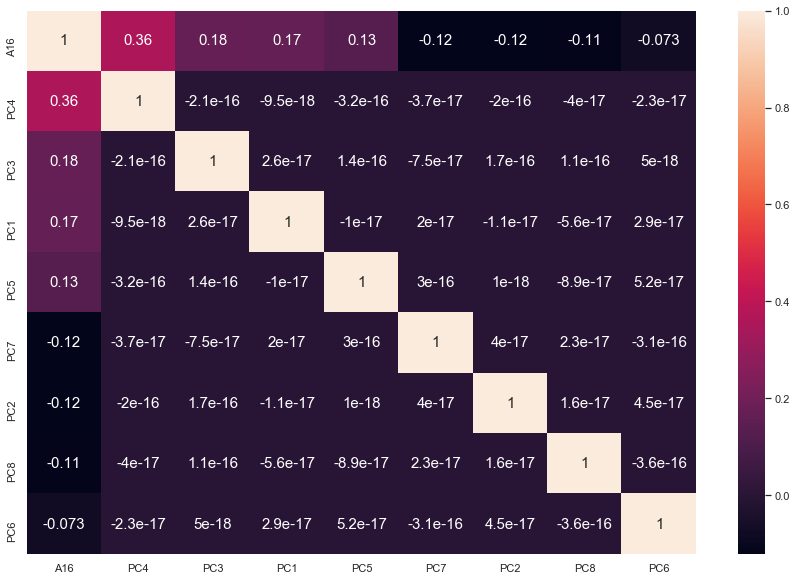

In [30]:
from pandas import DataFrame
import seaborn as sn

corrMatrix = Std_Data_Train.corr()
cls=(abs(corrMatrix['A16']))
p=cls.sort_values(ascending=False)

t=p.index

df = DataFrame(Std_Data_Train[t],columns=t)
                        
fig, ax = plt.subplots(figsize=(15,10),sharex=True, sharey=True) 
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True,annot_kws={"size": 15},ax=ax)

In [31]:
X_train.shape

(441, 8)

In [32]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

p=['PC4', 'PC3','PC1','PC5', 'PC7']

subdata = Std_Data_Train.loc[:,p+["A16"]]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,["A16"]]

# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
Y_train = np.array(np.ravel(Y_train)).astype(int)

print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(400,300,100,80,60,40,20,10), max_iter=250, activation='relu',solver='lbfgs',
                    verbose=20,  random_state=8,tol=0.001,alpha=0.03)



CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
#print(cm)
print("MLPClassifier ",'Testing Accuracy = ',test_score,"\n")
print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
print("\n"*2)



Only considering ['PC4', 'PC3', 'PC1', 'PC5', 'PC7'] 
size = 552


MLPClassifier Training Accuracy: 0.5578231292517006 

MLPClassifier  Testing Accuracy =  0.4594594594594595 

	TP: 0 	FP: 0 
	TN: 51 	FN: 60





In [33]:
#nural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

p=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1']

#p=[ 'A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14']

subdata = filled_filters_data.loc[:,p+['A16']]
subData=subdata.dropna(subset=p)

X=subData.loc[:,p]
Y=subData.loc[:,['A16']]



    
# Train and test set 80% : 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=33)
Y_train = np.array(np.ravel(Y_train)).astype(int)

print("\n============================================================================================")
print("Only considering",p,"\nsize =",len(subData))
print("============================================================================================\n\n")


CNN = MLPClassifier(hidden_layer_sizes=(100,20,10), max_iter=250, activation='relu',solver='lbfgs',
                    verbose=20,  random_state=8,tol=0.001,alpha=0.03)



CNN.fit(X_train, Y_train)
print("MLPClassifier Training Accuracy:",CNN.score(X_train, Y_train),"\n")



from sklearn.metrics import confusion_matrix

cm= confusion_matrix(Y_test,CNN.predict(X_test))

#Extract  TN, FP ,FN, TP
TN, FP ,FN, TP =  cm.ravel()

test_score=(TP+TN)/(TN+ FP +FN+ TP)
test_score=(TP+TN)/(TN+ FP +FN+ TP)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1=2*(Precision*Recall)/(Precision+Recall)



print('Accuracy = ',round(test_score,4))
print('Precision = ',round(Precision,4))
print('Recall = ',round(Recall,4))
print('F1 = ',round(F1,4),'\n')

print("\tTP:",TP,"\tFP:",FP,"\n\tTN:",TN,"\tFN:",FN )
print("\n"*2)



Only considering ['A11', 'A8', 'A12', 'A10', 'A5', 'A4', 'A3', 'A7', 'A2', 'A14', 'A15', 'A6', 'A9', 'A13', 'A1'] 
size = 452


MLPClassifier Training Accuracy: 0.9050632911392406 

Accuracy =  0.8676
Precision =  0.7636
Recall =  0.8936
F1 =  0.8235 

	TP: 42 	FP: 13 
	TN: 76 	FN: 5





C:\Users\Imesh Ekanayake\.conda\envs\Tensorflow\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
import numpy as np
from sklearn.impute import KNNImputer

P=t_cor

qwe=Data
frame = qwe.append(TData)
subdata_in = frame.loc[:,P]

imputer = KNNImputer(n_neighbors=400)
subData=imputer.fit_transform(subdata_in)

D=dict()
for i in range (len(P)):
    D[P[i]]=subData[:, i]

FrameData = pd.DataFrame(D)



FTData=FrameData[-len(TData):]


Test_data = FTData.loc[:,p]

CNN.predict(Test_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])